In [8]:
import pandas as pd
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['Spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
df.drop(['Category'],axis='columns',inplace=True)
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Spam,train_size=0.75)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [18]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [21]:
x_test_count = v.transform(X_test)
model.predict(x_test_count)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

1 = Spam 
0 = Ham

In [22]:
email = [
    'WINNER,You have won 20% dicount on PS5',
    'Hello Anshul this is a ml model to detect spam'
]
email_count = v.transform(email)
model.predict(email_count)

array([1, 0], dtype=int64)

In [23]:
model.score(x_test_count,y_test)

0.9863603732950467

In [24]:
y_predict = model.predict(x_test_count)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[1207,    3],
       [  16,  167]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

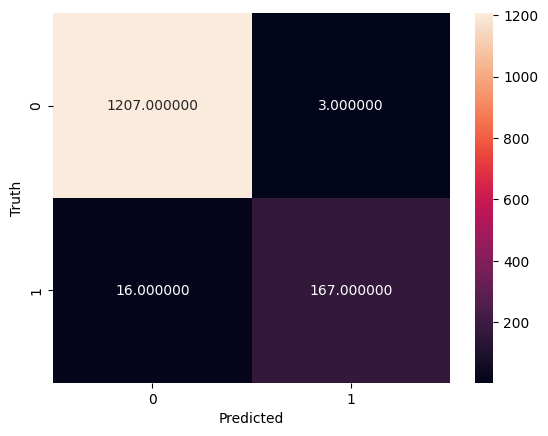

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure()
sns.heatmap(cm, annot=True,fmt='2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

With Sklearn Pipline so we don't need to convert to count first ourselves

In [29]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [30]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [32]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [34]:
clf.score(X_test,y_test)

0.9863603732950467

In [35]:
clf.predict(email)

array([1, 0], dtype=int64)

In [36]:
y_predict = model.predict(x_test_count)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[1207,    3],
       [  16,  167]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

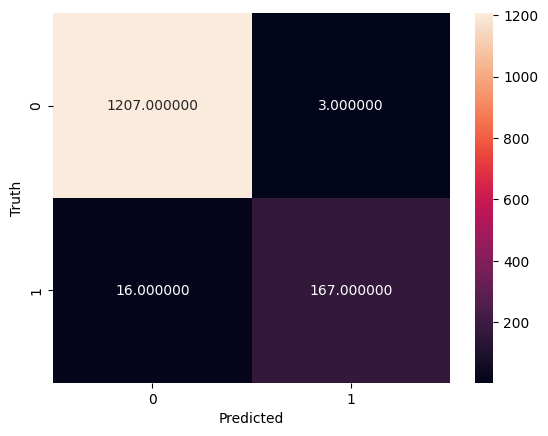

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure()
sns.heatmap(cm, annot=True,fmt='2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')